In [1]:
import pandas as pd

In [2]:
(1) #讀昆盈KYE股價資料
KYE=pd.read_csv('2365.csv',index_col='Date')
#KYE=pd.read_csv('2365.csv',sep='\t',index_col='Date')
KYE.index=pd.to_datetime(KYE.index)
KYE.head(n=3)

,Close
Date,
2014-01-02,9.4555
2014-01-03,9.5326
2014-01-06,9.5326


In [3]:
#讀仲琦Hitron股價資料
Hitron=pd.read_csv('2419.csv',index_col='Date')
#KYE=pd.read_csv('2365.csv',sep='\t',index_col='Date')
Hitron.index=pd.to_datetime(Hitron.index)
Hitron.head(n=3)

,Close
Date,
2014-01-02,12.2909
2014-01-03,12.1363
2014-01-06,11.9817


In [4]:
#定義配對形成期(formation period)
formStart='2014-01-01'
formEnd='2014-09-30'
KYef=KYE[formStart:formEnd]
Hitronf=Hitron[formStart:formEnd]
KYef.head(3)
Hitronf.head(3)

,Close
Date,
2014-01-02,12.2909
2014-01-03,12.1363
2014-01-06,11.9817


In [5]:
#將兩支股票收盤價整合再一起形成Dataframe
pairf=pd.concat([KYef.Close,Hitronf.Close],axis=1)
#len(pairf)
pairf

#改columns的名字,不然都叫Close
pairf.columns=['KYeP', 'HitronP']
pairf

,KYeP,HitronP
Date,,
2014-01-02,9.4555,12.2909
2014-01-03,9.5326,12.1363
2014-01-06,9.5326,11.9817
2014-01-07,9.5712,12.2136
2014-01-08,9.6098,12.2909
...,...,...
2014-09-24,9.7420,13.3648
2014-09-25,9.5783,13.0484
2014-09-26,9.4555,12.7717


In [6]:
import matplotlib.pyplot as plt

<Axes: title={'center': '2014 Close Price'}, xlabel='Date'>

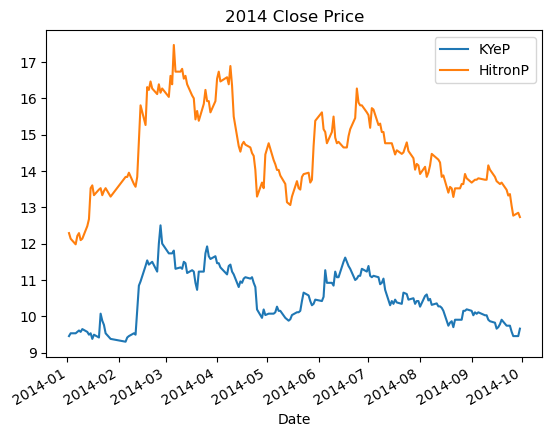

In [7]:
pairf.plot(title='2014 Close Price')

In [8]:
#(2)構造標準化價格之差平方累積SSD函數，並計算標準化價格距離
#def SSD(priceX, priceY):
#    if priceX is None or priceY is None:
#     print('缺少價格序列.')
#    standardX=priceX/priceX[0]
#    standardY=priceY/priceY[0]
#    SSD=np.sum((standardX-standardY)**2)
#    return(SSD)

In [9]:
#還未跑
#KYEf=pairf['KYE']
#Hitronf=pairf['Hitron']

#dis=SSD(KYEf,Hitronf)
#dis

In [10]:
#檢查序列穩定(匯入ADF函數與numpy套件)
#from arch.unitroot import ADF
from statsmodels.tsa.stattools import adfuller

In [11]:
import numpy as np

In [12]:
#檢定昆盈對數價格I(1)一階整合性
#先取股價對數
KYeflog=np.log(KYef)
Hitronflog=np.log(Hitronf)
#改欄位名字
KYeflog.columns=['KYeflog']
Hitronflog.columns=['Hitronflog']

KYeflog=KYeflog.dropna()
Hitronflog=Hitronflog.dropna()

Hitronflog

,Hitronflog
Date,
2014-01-02,2.508859
2014-01-03,2.496201
2014-01-06,2.483380
2014-01-07,2.502550
2014-01-08,2.508859
...,...
2014-09-24,2.592624
2014-09-25,2.568666
2014-09-26,2.547232


In [13]:
#check兩個時間序列是否都是非定態I(1)(即一階差分後定態）,這樣才能跑coint
#先看昆盈level是否為非定態
#不拒絕表示不穩定
from statsmodels.tsa.stattools import adfuller
adfA=adfuller(KYeflog)
print('ADF Statistics: %f' % adfA[0])
print('p-value: %f' % adfA[1])
print('Critical Values:')
for key, value in adfA[4].items():
 print('\t%s: %.3f' % (key,value))

ADF Statistics: -2.061447
p-value: 0.260297
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [14]:
 #看昆盈一階差分後是否為定態,即I(1)
#結果顯著表示穩定
retA=KYeflog.diff()[1:]
retA.rename(columns={'KYeflog':'retA'}) #改一下欄位名比較好理解
adfA=adfuller(retA)
print('ADF Statistics: %f' % adfA[0])
print('p-value: %f' % adfA[1])
print('Critical Values:')
for key, value in adfA[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistics: -12.804627
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [15]:
# 再看仲琦level是否為非定態
from statsmodels.tsa.stattools import adfuller
adfB=adfuller(Hitronflog)
print('ADF Statistics: %f' % adfB[0])
print('p-value: %f' % adfB[1])
print('Critical Values:')
for key, value in adfB[4].items():
 print('\t%s: %.3f' % (key,value))

ADF Statistics: -2.565087
p-value: 0.100430
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [16]:
 #再看仲琦一階差分後是否為定態即I(1)
retＢ=Hitronflog.diff()[1:]
retB.rename(columns={'Hitronflog':'retB'})   #改一下欄位名比較好理解
adfＢ=adfuller(retＢ)
print('ADF Statistics: %f' % adfＢ[0])
print('p-value: %f' % adfＢ[1])
print('Critical Values:')
for key, value in adfＢ[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistics: -5.436443
p-value: 0.000003
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [17]:
import statsmodels.api as sm
#statsmodels.regression.linear_model.OLS
#共整合檢定cointegration
#Y是昆盈A股票對數價格
#X是仲琦對數價格
#add_constant表示加入截距項
#先設超參數在fit
#係數皆有顯著
model=sm.OLS(KYeflog,sm.add_constant(Hitronflog))
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                KYeflog   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     648.2
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.47e-61
Time:                        09:26:38   Log-Likelihood:                 370.38
No. Observations:                 182   AIC:                            -736.8
Df Residuals:                     180   BIC:                            -730.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3869      0.077      5.009      0.0

In [18]:
#擷取回歸截距項與slope
alpha=result.params[0]
beta=result.params[1]
alpha
beta

C:\Users\User\AppData\Local\Temp\ipykernel_4444\83549826.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=result.params[0]
C:\Users\User\AppData\Local\Temp\ipykernel_4444\83549826.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta=result.params[1]


0.7353437818017321

In [19]:
#求殘差(ECM, error correction mechanism)
#利用真實的y檢調預測的y得到殘差
spreadf=KYeflog.KYeflog-beta*Hitronflog.Hitronflog-alpha
spreadf.head(100)

Date
2014-01-02    0.014773
2014-01-03    0.032202
2014-01-06    0.041629
2014-01-07    0.031574
2014-01-08    0.030960
                ...   
2014-05-28    0.017748
2014-05-29   -0.026486
2014-05-30   -0.049384
2014-06-03   -0.064084
2014-06-04   -0.030860
Length: 100, dtype: float64

<Axes: xlabel='Date'>

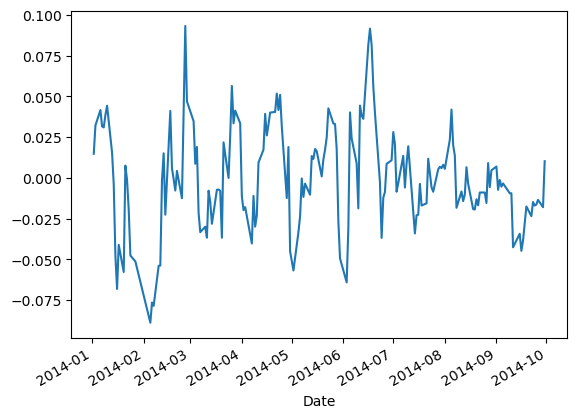

In [20]:
#畫殘差序列圖
spreadf.plot()

In [21]:
#價差單根檢定, 若價差穩定stationary表示兩序列的確有共整合關係(長期均衡關係)
#拒絕H0，表示為定態
from statsmodels.tsa.stattools import adfuller
adfspread=adfuller(spreadf)
print('ADF Statistics: %f' % adfspread[0])
print('p-value: %f' % adfspread[1])
print('Critical Values:')
for key, value in adfspread[4].items():
 print('\t%s: %.3f' % (key,value))

ADF Statistics: -5.116535
p-value: 0.000013
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


In [22]:
#當交易期價差超過u+1.2sigma-->開倉
#當交易期價差又回到u附近時,進行平倉
#當sigma倍數設定較小,會頻觸發交易訊號,但賺取的收益較小
#若倍數設定較大,會有較高收益,但較少觸發交易訊號
mu=np.mean(spreadf)
sd=np.std(spreadf)
print(mu)
print(sd)
print(mu+1.2*sd)
print(mu-1.2*sd)

8.064367244804708e-16
0.031619184391863134
0.03794302127023656
-0.03794302127023495


In [23]:
#交易期
#用前九個月形成交易策略，後三個月為交易期
tradStart='2014-10-01'
tradEnd='2014-12-31'
KYEt=KYE[tradStart:tradEnd].Close
Hitront=Hitron[tradStart:tradEnd].Close
KYEt

Date
2014-10-01     9.8238
2014-10-02     9.8238
2014-10-03     9.7420
2014-10-06     9.7420
2014-10-07     9.5783
               ...   
2014-12-26     9.9466
2014-12-27     9.9466
2014-12-29    10.1513
2014-12-30     9.9466
2014-12-31     9.9466
Name: Close, Length: 66, dtype: float64

In [24]:
CoSpreadT=np.log(KYEt)-beta*np.log(Hitront)-alpha
CoSpreadT.describe()

count    66.000000
mean     -0.022154
std       0.033877
min      -0.090217
25%      -0.049913
50%      -0.021257
75%       0.001238
max       0.069636
Name: Close, dtype: float64

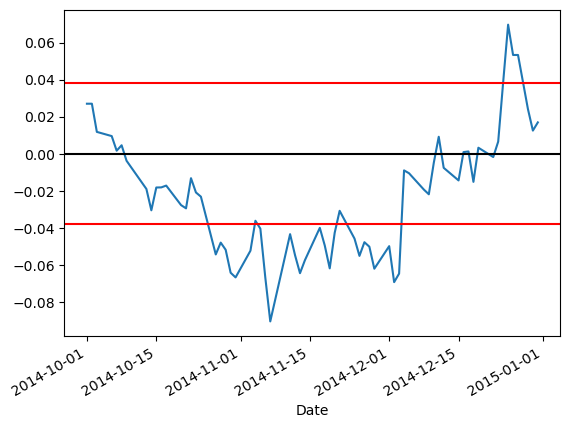

In [25]:
#交易期價差序列(共整合配對後)
#藍色線觸碰到紅線，觸發交易訊號
CoSpreadT.plot()
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+1.2*sd,color='red')
plt.axhline(y=mu-1.2*sd,color='red')

In [26]:
print('Correlation: ' + str(KYeflog.KYeflog.corr(Hitronflog.Hitronflog)))

#較正式的ECM的ECM (cointegration test),短期修正效果,p-value小就有共整合

from statsmodels.tsa.stattools import coint
#result_coint=coint()
score, pvalue, _ = coint(KYeflog,Hitronflog, maxlag=1)
print('Cointegration test score: ' + str(score))
print('Cointegration test p-value: ' + str(pvalue))
#print('coint t-Statistics: %f' % result_coint[0])
#print('p-value: %f' % result_coint[1])
#print('Critical Values:')
#for key, value in result_coint[4]:
# print('\t%s: %.3f' % (key,value))

Correlation: 0.8846823776456153
Cointegration test score: -5.130761627197595
Cointegration test p-value: 9.397663677371489e-05


In [27]:
#開始VAR模型
from statsmodels.tsa.api import VAR

In [28]:
#model=VAR(pairf)

In [29]:
#選取最佳order
#model.select_order(maxlags=12).summary()

In [30]:
#找出最佳order(p=1)的自回歸模型
#model_fitted=model.fit(1)
#model_fitted.summary()

In [31]:
#將兩支股票報酬率整合再一起形成Dataframe
pair_ret=pd.concat([retA,retB],axis=1)
#len(pair_ret)
pair_ret

,KYeflog,Hitronflog
Date,,
2014-01-03,0.008121,-0.012658
2014-01-06,0.000000,-0.012820
2014-01-07,0.004041,0.019170
2014-01-08,0.004025,0.006309
2014-01-09,-0.004025,-0.015844
...,...,...
2014-09-24,0.000000,0.002967
2014-09-25,-0.016946,-0.023959
2014-09-26,-0.012904,-0.021434


In [42]:
#select_order為選擇適當的lag，本例表示選擇12期內有關連的
#結果顯示最有關係的是lag0
model_ret=VAR(pair_ret)
model_ret.select_order(maxlags=12).summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-15.45*,-15.41*,1.950e-07*,-15.44*
1,-15.44,-15.33,1.964e-07,-15.40
2,-15.40,-15.22,2.043e-07,-15.33
3,-15.37,-15.11,2.114e-07,-15.26
4,-15.37,-15.04,2.106e-07,-15.24
5,-15.40,-14.99,2.057e-07,-15.23
6,-15.43,-14.95,1.997e-07,-15.23
7,-15.41,-14.85,2.038e-07,-15.18
8,-15.45,-14.82,1.962e-07,-15.19
9,-15.42,-14.72,2.004e-07,-15.14


In [43]:
#找出最佳order(p=0)的自回歸模型
#因為最佳為lag0，所以式constant
model_fitted=model_ret.fit(0)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Oct, 2024
Time:                     09:56:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.4568
Nobs:                     181.000    HQIC:                  -15.4778
Log likelihood:           890.381    FPE:                1.87007e-07
AIC:                     -15.4921    Det(Omega_mle):     1.84958e-07
--------------------------------------------------------------------
Results for equation KYeflog
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000118         0.001450            0.082           0.935

Results for equation Hitronflog
           coefficient       std. error           t-stat            prob
---------------------------------------------------------

In [34]:
from statsmodels.tsa.stattools import grangercausalitytests


In [35]:
url="https://raw.githubusercontent.com/Statology/Miscellaneous/main/chicken_egg.txt"
df=pd.read_csv(url,sep=" ")
df.head()

,year,Unnamed: 1,chicken,Unnamed: 3,egg
0,1930,NaN,468491,NaN,3581
1,1931,NaN,449743,NaN,3532
2,1932,NaN,436815,NaN,3327
3,1933,NaN,444523,NaN,3255
4,1934,NaN,433937,NaN,3156


In [54]:
#perform Granger-Causality test
# Q: eggs --> chicken ?
# whether eggs granger cause the chicken ?

#Note: if F large or p-value is small then we can reject H0 of the test
#and conclude that number of eggs is useful
#in predicting the future # of chickens

#P值顯著，表示蛋可以生雞

grangercausalitytests(df[['chicken','egg']],maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=18.7946 , p=0.0003  , df=3
likelihood ratio test: chi2=16.0003 , p=0.0011  , df=3
parameter F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3


{3: ({'ssr_ftest': (5.404984372335097, 0.002966397445576194, 44.0, 3),
   'ssr_chi2test': (18.794604749256134, 0.0003014773550056756, 3),
   'lrtest': (16.000284988230078, 0.0011338317398183065, 3),
   'params_ftest': (5.4049843723282125, 0.0029663974455973923, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [55]:
#perform 逆向 Granger-Causality test
# Q: chicken --> eggs  ?
# whether chicken granger cause the eggs  ?

#Note: if F large or p-value is small then we can reject H0 of the test
#and conclude that number of chickens is useful
#in predicting the future # of eggs

#結果補

grangercausalitytests(df[['egg','chicken']],maxlag=[3])




Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5916  , p=0.6238  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=2.0572  , p=0.5606  , df=3
likelihood ratio test: chi2=2.0168  , p=0.5689  , df=3
parameter F test:         F=0.5916  , p=0.6238  , df_denom=44, df_num=3


{3: ({'ssr_ftest': (0.5916153294546921, 0.6237862003924051, 44.0, 3),
   'ssr_chi2test': (2.0572078501492705, 0.5606182956436954, 3),
   'lrtest': (2.0167996971327966, 0.5689271966977385, 3),
   'params_ftest': (0.5916153294546896, 0.6237862003924062, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [38]:
import pandas_datareader as pdr
# 从FRED数据库下载GDP, 通货膨胀率和联邦基金利率的数据
macrodata = pdr.get_data_fred(['GDP', 'CPIAUCSL', 'FEDFUNDS'], start='2000-01-01', end='2023-01-01')
macrodata.head()

,GDP,CPIAUCSL,FEDFUNDS
DATE,,,
2000-01-01,10002.179,169.3,5.45
2000-02-01,NaN,170.0,5.73
2000-03-01,NaN,171.0,5.85
2000-04-01,10247.720,170.9,6.02
2000-05-01,NaN,171.2,6.27


In [44]:
# 填补空缺值并进行差分处理（解决单位根问题）
macrodata = macrodata.fillna(method='ffill').dropna()  # 处理缺失值
macrodata_diff = macrodata.diff().dropna()  # 差分数据，因為第一筆會是空值，因為沒有辦法相減，要drop掉

C:\Users\User\AppData\Local\Temp\ipykernel_4444\1336413938.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macrodata = macrodata.fillna(method='ffill').dropna()  # 处理缺失值


In [46]:
#選 1和 5都可以
from statsmodels.tsa.api import VAR

model2 = VAR(macrodata_diff)
model2.select_order(maxlags=12).summary()

,AIC,BIC,FPE,HQIC
0,6.547,6.588,697.4,6.564
1,5.539,5.702*,254.5,5.605
2,5.464,5.748,235.9,5.578
3,5.382,5.789,217.5,5.546
4,5.353,5.882,211.4,5.566
5,5.206*,5.857,182.5*,5.468*
6,5.219,5.991,184.9,5.529
7,5.260,6.154,192.7,5.619
8,5.282,6.298,197.1,5.690
9,5.258,6.395,192.5,5.715


In [48]:
fitted_model = model2.fit(2)
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Oct, 2024
Time:                     10:08:42
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.69820
Nobs:                     274.000    HQIC:                   5.53243
Log likelihood:          -1888.08    FPE:                    226.177
AIC:                      5.42129    Det(Omega_mle):         209.692
--------------------------------------------------------------------
Results for equation GDP
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              53.892847        14.371406            3.750           0.000
L1.GDP             -0.231112         0.060493           -3.820           0.000
L1.CPIAUCSL        78.568299        18.491901            4.249        

In [51]:
# Granger 因果检验 的 另種python函式 (比egg跟chicken例子用的函式好)
# GDP 是否 Granger 引起 CPIAUCSL (通货膨胀率)
#先寫y再寫x
#結果表示GDP會Granger引起CPIAUCSL
#結果表示CPIAUCSL (通货膨胀率)不會Granger引起FEDFUNDS(利率)
granger_test_gdp_cpi = fitted_model.test_causality('CPIAUCSL', ['GDP'], kind='f')
print('Granger causality test for GDP causing Inflation:')
print(granger_test_gdp_cpi.summary())

# CPIAUCSL (通货膨胀率) 是否 Granger 引起 FEDFUNDS (利率)
granger_test_cpi_fedfunds = fitted_model.test_causality('FEDFUNDS', ['CPIAUCSL'], kind='f')
print('Granger causality test for Inflation causing Interest Rate:')
print(granger_test_cpi_fedfunds.summary())

Granger causality test for GDP causing Inflation:
Granger causality F-test. H_0: GDP does not Granger-cause CPIAUCSL. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         3.517          3.007   0.030 (2, 801)
----------------------------------------------
Granger causality test for Inflation causing Interest Rate:
Granger causality F-test. H_0: CPIAUCSL does not Granger-cause FEDFUNDS. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         1.299          3.007   0.273 (2, 801)
----------------------------------------------


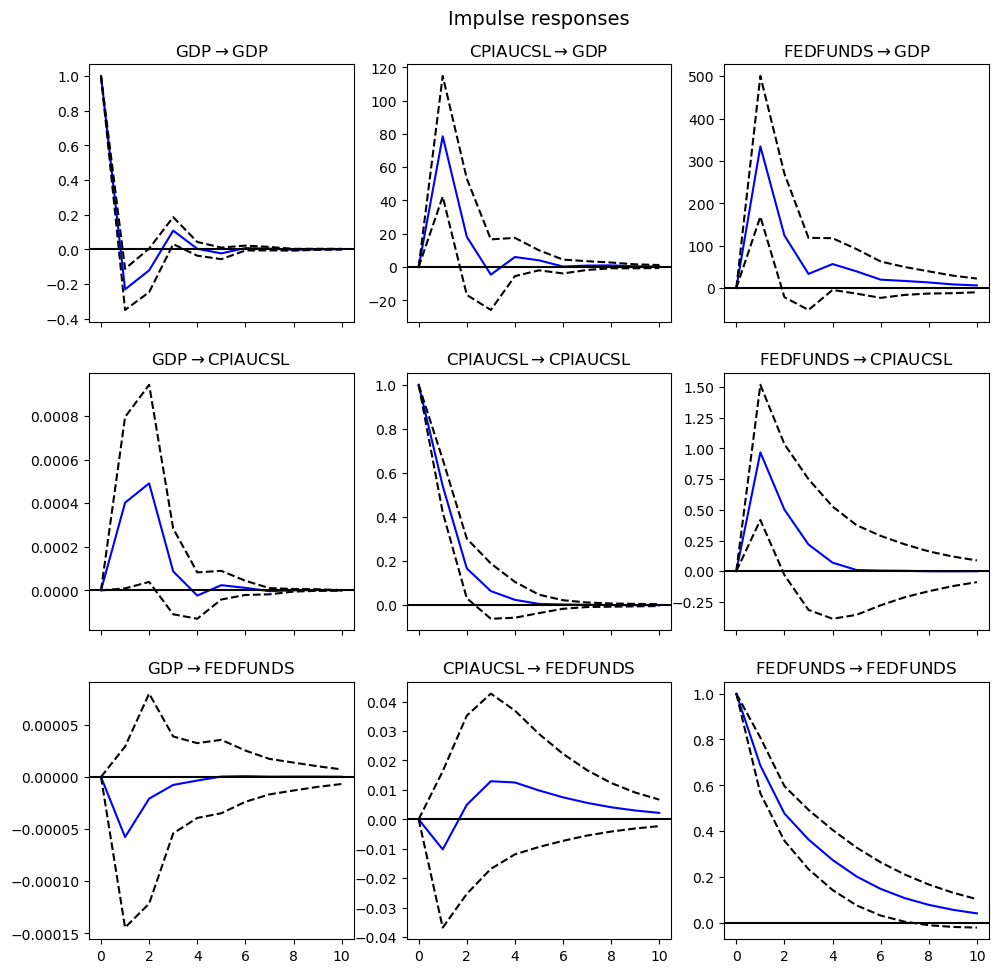

In [53]:
# 計算並绘制冲击响应函数 (IRF, impulse response function)
#CPIAUCSL和GDP的關係，表示第一期的影響較大，其他期影響較小
irf = fitted_model.irf(10)  # 計算10期的IRF
irf.plot(orth=False)
plt.show()

In [ ]:
# 建立共整合模型(另種方法)
#因為如果有很多檔股票，不太能一個一個用回歸處理，故可以這樣操作
#測試統計量夠大，也就是大於所有臨界值，表示是可以用的向量
#所以第一個是可以用的，第二個可能就不太適合
from statsmodels.tsa.vector_ar.vecm import coint_johansen

johansen_test = coint_johansen(pairf, det_order=0, k_ar_diff=1)
# 輸出結果
print("特徵值:", johansen_test.eig)
print("共整合向量:", johansen_test.evec)
print("測試統計量:", johansen_test.lr1)
print("臨界值:", johansen_test.cvt)